In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns
from datasets import load_dataset

# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

#convert job_skills to list
df['job_skills'] = df['job_skills'].apply(lambda skill_li: ast.literal_eval(skill_li) if pd.notna(skill_li) else skill_li)


In [50]:
df_us = (df[df['job_country'] == 'India']).dropna(subset=['salary_year_avg'])

df_us['job_country'].value_counts()

job_country
India    582
Name: count, dtype: int64

In [51]:
job_titles = df_us['job_title_short'].value_counts().index[:6].to_list()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [43]:
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]
df_us_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,79200.0,NaN,Bosch Group,"[python, opencv, tensorflow, pytorch, keras, m...","{'libraries': ['opencv', 'tensorflow', 'pytorc..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'..."
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi..."
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,79200.0,NaN,ServiceNow,"[sql, perl, bash, groovy, python, shell, redis...","{'analyst_tools': ['tableau'], 'cloud': ['azur..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781857,Senior Data Engineer,Senior Data Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-03-26 06:17:50,False,False,India,year,147500.0,NaN,Publicis Groupe,"[sas, sas, sql, python, oracle]","{'analyst_tools': ['sas'], 'cloud': ['oracle']..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,"[r, python, sql, databricks, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['dat..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,"[sql, python, azure, databricks, spark, power ...","{'analyst_tools': ['power bi', 'tableau', 'qli..."


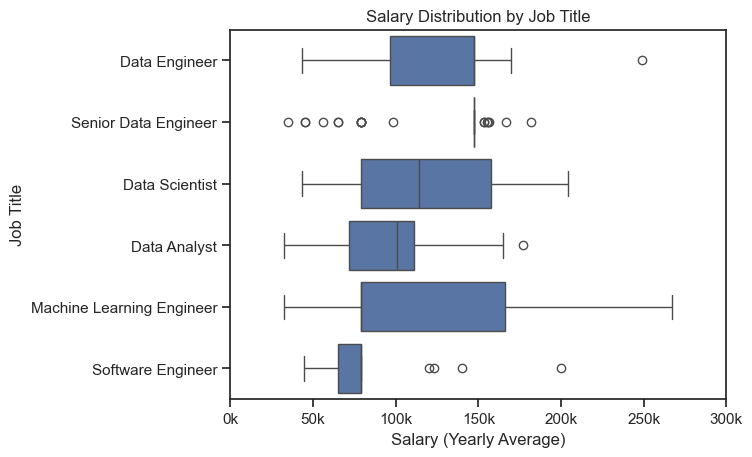

In [47]:
sns.boxplot(data=df_us_top6,x='salary_year_avg', y='job_title_short',order=job_titles)
sns.set_theme(style='ticks')


plt.title('Salary Distribution by Job Title')
plt.xlabel('Salary (Yearly Average)')
plt.ylabel('Job Title')
plt.xlim(0,300000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.suptitle('')  # Removes the automatic "Boxplot grouped by ..."
plt.show()

In [46]:
job_titles = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index


In [49]:
df_da_us = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] =='India')].copy()

df_da_us = df_da_us.dropna(subset = ['salary_year_avg'])

df_da_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
9143,Data Scientist,Manager - Data Science,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-12 13:28:49,False,False,India,year,79200.0,NaN,BitGo,"[sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
16358,Data Scientist,Data Scientist,India,via Ai-Jobs.net,Full-time,False,India,2023-07-19 13:12:35,False,False,India,year,157500.0,NaN,Silent Eight,"[python, sql, bash, postgresql, pandas, pyspar...","{'async': ['jira', 'confluence'], 'databases':..."
27440,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-15 13:27:09,False,False,India,year,157500.0,NaN,"AppZen, Inc.","[python, r]","{'programming': ['python', 'r']}"
30999,Data Scientist,Data Scientist,"Noida, Uttar Pradesh, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:07,False,False,India,year,157500.0,NaN,HashiCorp,"[python, aws, numpy, pandas, tensorflow, pytor...","{'cloud': ['aws'], 'libraries': ['numpy', 'pan..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762560,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-12 20:29:35,False,False,India,year,70000.0,NaN,Avaloq,"[python, r, sql, java, mysql, sql server, reds...","{'analyst_tools': ['tableau', 'power bi'], 'cl..."
762634,Data Scientist,Data Modeller,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-23 20:30:17,True,False,India,year,64800.0,NaN,Capco,"[sql, python, scala, hadoop]","{'libraries': ['hadoop'], 'programming': ['sql..."
768729,Data Scientist,Lead Data Modeler/Developer for Business Analy...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-04 01:33:21,False,False,India,year,79200.0,NaN,Bosch Group,[sql],{'programming': ['sql']}
770989,Data Scientist,"Data Scientist –ML, DL, Python","Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-21 01:12:02,False,False,India,year,157500.0,NaN,Capco,"[python, r, sql, t-sql, sql server, snowflake,...","{'analyst_tools': ['tableau', 'power bi', 'qli..."


In [50]:
df_da_us = df_da_us.explode('job_skills')
df_da_us['job_skills'].head(5)

3930        python
3930             r
3930           c++
3930    tensorflow
3930       tableau
Name: job_skills, dtype: object

In [51]:
df_da_top_pay = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)

df_da_top_pay = df_da_top_pay.head(10)

df_da_top_pay

,count,median
job_skills,,
shell,3,170500.0
express,1,170500.0
looker,1,166419.5
databricks,4,164037.5
bigquery,2,160000.0
go,6,157500.0
haskell,1,157500.0
sql server,7,157500.0
jira,3,157500.0


In [52]:
df_da_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

df_da_skills = df_da_skills.head(10).sort_values(ascending=False,by='median')

df_da_skills

,count,median
job_skills,,
azure,15,157500.00
pytorch,10,157500.00
python,64,152500.00
tensorflow,16,136008.00
r,30,129758.00
sql,49,113500.00
tableau,19,113500.00
aws,20,103550.00
spark,23,93600.00


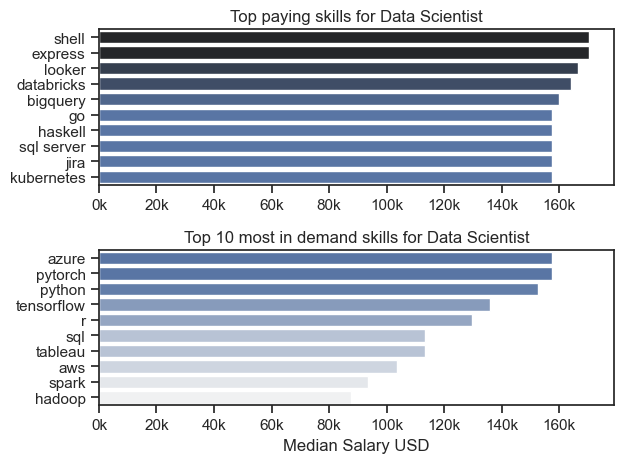

In [71]:
fig , ax =plt.subplots(2,1)
sns.set_theme(style='ticks')


sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0],hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top paying skills for Data Scientist')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

#df_da_skills.plot(kind='barh', y='median', ax=ax[1])
sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1],hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 most in demand skills for Data Scientist')
ax[1].set_xlabel('Median Salary USD')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.tight_layout()
plt.show()
